<a href="https://colab.research.google.com/github/sournara/Computer_Vision_Study/blob/main/TensorFlow/TensorFlow_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 학습 코드를 실행하기 전에 [런타임]-[런타임 유형 변경]에서 하드웨어 가속기를 [GPU]로 설정한다.
### **데이터 세트 다운로드**
- 딥러닝 모델 학습 과정에서 필요한 데이터 세트를 불러온다.

In [1]:
!git clone https://github.com/ndb796/weather_dataset

Cloning into 'weather_dataset'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1117 (delta 0), reused 3 (delta 0), pack-reused 1111
Receiving objects: 100% (1117/1117), 85.23 MiB | 30.84 MiB/s, done.


In [2]:
%cd weather_dataset

/content/weather_dataset


### **라이브러리 불러오기(Load Libraries)**
- 딥러닝 모델 학습 과정에서 필요한 라이브러리를 불러온다.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

### **데이터 세트 불러오기(Load Dataset)**
1. **데이터 증진(data augmentation)**을 명시하여 초기화할 수 있다.
    - 이미지를 불러올 때 어떤 방법(회전, 자르기, 뒤집기 등)을 사용할 것인지 명시한다.
2. 이후에 **flow()**를 이용하여 실질적으로 데이터를 불러올 수 있다.
    - 어떤 데이터를 사용할 것인지, 배치 크기(batch size), 데이터 셔플(shuffle) 여부 등을 명시한다.
    - **next() 함수**를 이용하여 numpy array 형태로 데이터를 배치 단위로 얻을 수 있다.
- **Reference** : https://www.kaggle.com/datasets/pratik2901/multiclass-weather-dataset

In [5]:
train_generator = ImageDataGenerator(
    rescale = 1 / 255.,
    horizontal_flip = True,
    validation_split = 0.2
)
test_generator = ImageDataGenerator(rescale = 1 / 255.)

train_flow = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle = True,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64,
    subset = 'training'
)
val_flow = train_generator.flow_from_directory(
    directory = 'train/',
    shuffle = True,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64,
    subset = 'validation'
)
test_flow = test_generator.flow_from_directory(
    directory = 'test/',
    shuffle = False,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 64
)

Found 676 images belonging to 4 classes.
Found 168 images belonging to 4 classes.
Found 281 images belonging to 4 classes.


### **데이터 시각화(Data Visualization)**

['Shine', 'Sunrise', 'Sunrise', 'Shine']


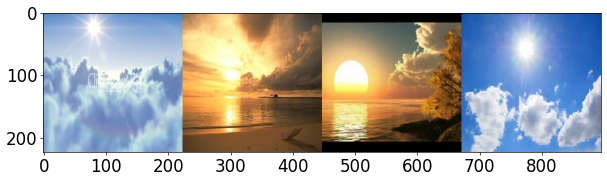

In [6]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size' : 20})

class_names = {
    0 : "Cloudy",
    1 : "Rain",
    2 : "Shine",
    3 : "Sunrise"
}

images, targets = next(train_flow)

print([class_names[x] for x in np.argmax(targets[:4], axis = 1)])
plt.imshow(np.concatenate((images[0], images[1], images[2], images[3]), axis = 1))
plt.show()

### **딥러닝 모델 학습(Training)**
- 자신이 직접 정의한 뉴럴 네트워크를 이용하여 데이터 세트에 대한 학습이 가능하다.
    - 레이어의 깊이를 늘려 가며, 파라미터의 개수를 증가시킬 수 있다.

In [7]:
def get_model_1() :
    model = Sequential()
    model.add(layers.Input(shape = (224, 224, 3)))
    model.add(layers.Flatten()) # dimension : 224 * 224 * 3
    model.add(layers.Dense(4, activation = "softmax"))
    return model

def get_model_2() :
    model = Sequential()
    model.add(layers.Input(shape = (224, 224, 3)))
    model.add(layers.Flatten()) # dimension : 224 * 224 * 3
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(4, activation = "softmax"))
    return model

def get_model_3() :
    model = Sequential()
    model.add(layers.Input(shape = (224, 224, 3)))
    model.add(layers.Flatten()) # dimension : 224 * 224 * 3
    model.add(layers.Dense(128, activation = "relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation = "relu"))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4, activation = "softmax"))
    return model

### **학습 결과 확인하기**
- 학습 결과를 시각화하여 정상적으로 모델이 학습되었는지 확인한다.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │         602,116 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 602,116 (2.30 MB)

 Trainable params: 602,116 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - accuracy: 0.3341 - loss: 55.0578 - val_accuracy: 0.4464 - val_loss: 63.9554
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.4495 - loss: 54.9599 - val_accuracy: 0.5893 - val_loss: 33.0991
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.5102 - loss: 36.1343 - val_accuracy: 0.5714 - val_loss: 46.1684
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 212ms/step - accuracy: 0.5844 - loss: 30.7995 - val_accuracy: 0.6667 - val_loss: 61.6316
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.6359 - loss: 24.7877 - val_accuracy: 0.5119 - val_loss: 60.9360
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 0.5255 - loss: 42.0760 - val_accuracy: 0.6548 - val_loss: 54.2923
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.6048 - loss: 26.8687 - val_accuracy: 0.5417 - val_loss: 25.4632
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.5558 - loss: 34.6516 - val_accuracy

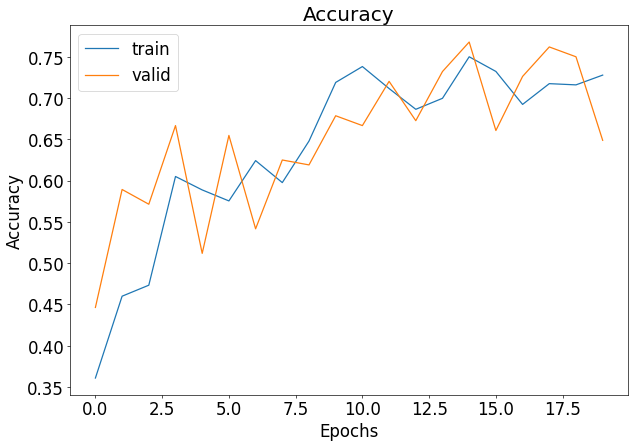

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step - accuracy: 0.7446 - loss: 9.1051
Test loss : 8.46871948
Test accuracy : 76.51%


In [10]:
model_1 = get_model_1()
model_1.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_1.compile(
    optimizer = optimizers.SGD(learning_rate = learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
# 학습 수행
history = model_1.fit(
    train_flow,
    epochs = 20,
    validation_data = val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_1.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss : {test_loss :.8f}")
print(f"Test accuracy : {test_accuracy * 100.:.2f}%")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       9,633,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,634,116 (36.75 MB)

 Trainable params: 9,634,116 (36.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 468ms/step - accuracy: 0.2998 - loss: 10.4064 - val_accuracy: 0.2262 - val_loss: 1.3877
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.2347 - loss: 1.3903 - val_accuracy: 0.0893 - val_loss: 1.4222
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 245ms/step - accuracy: 0.2355 - loss: 1.3879 - val_accuracy: 0.3095 - val_loss: 1.3849
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.3075 - loss: 1.3837 - val_accuracy: 0.3155 - val_loss: 1.3819
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.3261 - loss: 1.3754 - val_accuracy: 0.3155 - val_loss: 1.1345
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.3059 - loss: 1.3807 - val_accuracy: 0.3155 - val_loss: 1.3827
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - accuracy: 0.3310 - loss: 1.3817 - val_accuracy: 0.3155 - val_loss: 1.3820
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.3045 - loss: 1.3824 - val_accuracy: 

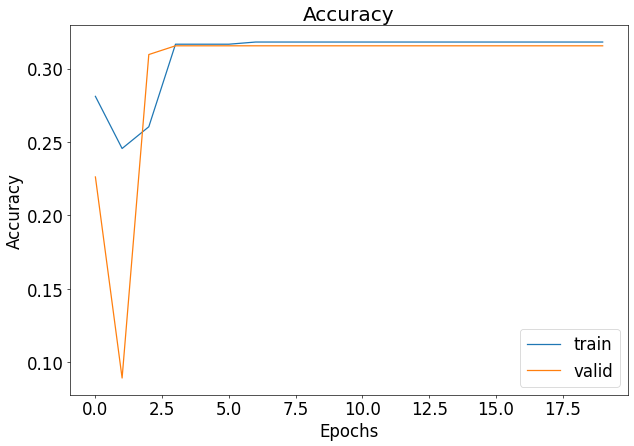

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.1472 - loss: 1.3864
Test loss : 1.37513316
Test accuracy : 31.67%


In [11]:
model_2 = get_model_2()
model_2.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_2.compile(
    optimizer = optimizers.SGD(learning_rate = learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
# 학습 수행
history = model_2.fit(
    train_flow,
    epochs = 20,
    validation_data = val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_2.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss : {test_loss :.8f}")
print(f"Test accuracy : {test_accuracy * 100.:.2f}%")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      19,267,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,278,180 (73.54 MB)

 Trainable params: 19,278,180 (73.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 601ms/step - accuracy: 0.2652 - loss: 4.0930 - val_accuracy: 0.4524 - val_loss: 1.3756
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.3306 - loss: 1.3624 - val_accuracy: 0.3155 - val_loss: 1.3807
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.3050 - loss: 1.3988 - val_accuracy: 0.3155 - val_loss: 1.2892
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 0.2870 - loss: 1.3187 - val_accuracy: 0.3155 - val_loss: 1.2617
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.3193 - loss: 1.3071 - val_accuracy: 0.3095 - val_loss: 1.1491
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.3482 - loss: 1.2420 - val_accuracy: 0.5238 - val_loss: 1.0972
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.3834 - loss: 1.2694 - val_accuracy: 0.5357 - val_loss: 1.0803
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.3664 - loss: 1.2426 - val_accuracy: 0

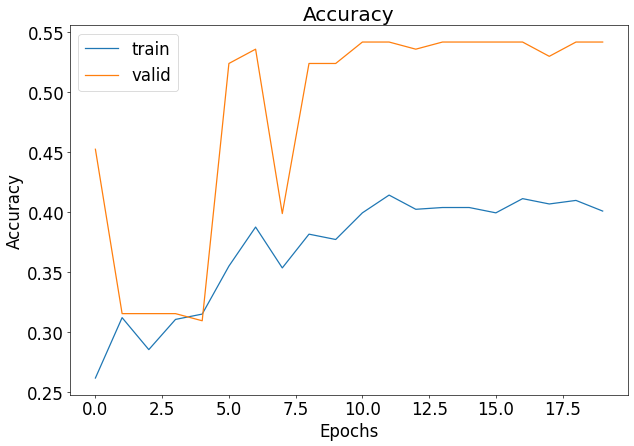

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.5906 - loss: 1.1843
Test loss : 0.97427964
Test accuracy : 56.94%


In [12]:
model_3 = get_model_3()
model_3.summary()
learning_rate = 0.01

# 학습 준비 단계(compile)
model_3.compile(
    optimizer = optimizers.SGD(learning_rate = learning_rate),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
# 학습 수행
history = model_3.fit(
    train_flow,
    epochs = 20,
    validation_data = val_flow
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Accuracy')
plt.legend(['train', 'valid'])
plt.show()

# 학습된 모델 테스트
test_history = model_3.evaluate(test_flow)
test_loss, test_accuracy = test_history

print(f"Test loss : {test_loss :.8f}")
print(f"Test accuracy : {test_accuracy * 100.:.2f}%")